In [1]:
import pandas as pd
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf

In [2]:
import datetime as dt

start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'HDFCBANK.NS'  # Stock symbol in uppercase

stock_data = yf.download(symbol, start=start, end=end)
stock_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,1502.000000,1502.000000,1483.000000,1486.750000,1433.425293,8455721
2021-07-02,1485.000000,1489.250000,1477.000000,1480.400024,1427.302979,7413518
2021-07-05,1489.949951,1504.500000,1484.550049,1495.449951,1441.813232,3686941
2021-07-06,1497.000000,1540.000000,1496.000000,1534.699951,1479.655518,8834516
2021-07-07,1534.000000,1545.349976,1527.699951,1539.500000,1484.283325,4814595
...,...,...,...,...,...,...
2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951,1463.988159,7158813
2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000,1454.877197,7598923
2022-01-21,1500.000000,1529.800049,1485.599976,1521.599976,1467.025391,5768847


In [3]:
stock_data =stock_data[['Open','High','Low','Close']]
stock_data

,Open,High,Low,Close
Date,,,,
2021-07-01,1502.000000,1502.000000,1483.000000,1486.750000
2021-07-02,1485.000000,1489.250000,1477.000000,1480.400024
2021-07-05,1489.949951,1504.500000,1484.550049,1495.449951
2021-07-06,1497.000000,1540.000000,1496.000000,1534.699951
2021-07-07,1534.000000,1545.349976,1527.699951,1539.500000
...,...,...,...,...
2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951
2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000
2022-01-21,1500.000000,1529.800049,1485.599976,1521.599976


In [4]:
column ='Close'

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms= MinMaxScaler()
data = Ms.fit_transform(stock_data[[column]])
print("Length of the data {} and Shape of data {}".format(len(data),data.shape))

Length of the data 143 and Shape of data (143, 1)


In [6]:
from sklearn.metrics import mean_squared_error
# trends = ['n','t','c','ct']
orders = [(0,0,1),(0,1,1),(1,1,1),(2,0,0)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
for i in orders:
    model = SARIMAX(data,order =i,seasonal_order=(0,0,0,12))
    model_fit=model.fit()
    
    test_pred = model_fit.predict(0,len(data)-1)
    test_pred
    
#     from sklearn.metrics import r2_score
#     mse = mean_squared_error(Y_test,test_pred,squared =False)
    
    from functions import rmsemape
    print("Order ={}".format(i))
    rmsemape(data,test_pred)
    print("*****************")

C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order =(0, 0, 1)
RMSE-Testset: 0.25814577975009556
maPe-Testset: 953375548714.6929
*****************


C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Order =(0, 1, 1)
RMSE-Testset: 0.06895413941642942
maPe-Testset: 2661095431075.849
*****************


C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Order =(1, 1, 1)
RMSE-Testset: 0.06744681485273991
maPe-Testset: 2527033380854.999
*****************
Order =(2, 0, 0)
RMSE-Testset: 0.06883929007922286
maPe-Testset: 2617436526252.863
*****************


C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [7]:
len(test_pred)

143

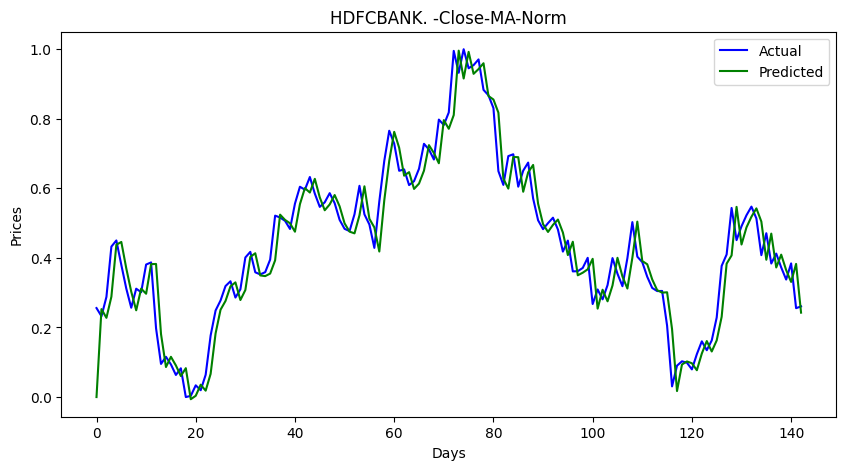

In [8]:
from functions import graph
graph(data,test_pred,"Actual","Predicted","HDFCBANK. -Close-MA-Norm","Days","Prices")

In [9]:
from functions import conversionSingle
aTestNormTable = conversionSingle(data,['Close'])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
# actual_stock_price_test_ori
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,['Close'])
actual_stock_price_test_oriA

,Close
0,1486.75
1,1480.400024
2,1495.449951
3,1534.699951
4,1539.5
...,...
138,1518.449951
139,1509.0
140,1521.599976
141,1486.650024


In [10]:
# from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(test_pred,['Close'])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,['Close'])

In [11]:
predicted_stock_price_test_oriP

,Close
0,1417.300049
1,1485.935121
2,1479.128992
3,1495.590739
4,1536.156931
...,...
138,1528.418174
139,1516.365998
140,1507.13627
141,1521.227612


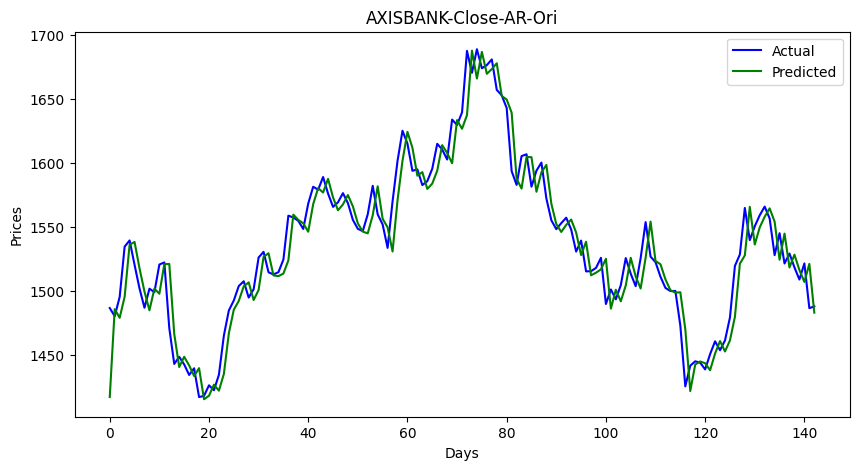

In [12]:
# from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","AXISBANK-Close-AR-Ori","Days","Prices")

In [13]:
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)


RMSE-Testset: 18.682976604914177
maPe-Testset: 0.009327499195177825


C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
forecast=model_fit.predict(len(data), len(data)+30)
forecast

array([0.25778388, 0.25431568, 0.25084881, 0.24742577, 0.24404917,
       0.24071864, 0.23743355, 0.2341933 , 0.23099726, 0.22784485,
       0.22473545, 0.22166849, 0.21864338, 0.21565955, 0.21271645,
       0.20981351, 0.20695019, 0.20412594, 0.20134024, 0.19859255,
       0.19588236, 0.19320915, 0.19057243, 0.18797169, 0.18540644,
       0.1828762 , 0.18038049, 0.17791884, 0.17549078, 0.17309586,
       0.17073362])

In [15]:
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])
forecast_stock_price_test_oriF

,Closefore
0,1487.262568
1,1486.321299
2,1485.380392
3,1484.451378
4,1483.53497
5,1482.631063
6,1481.739491
7,1480.860087
8,1479.992684
9,1479.137118


In [16]:
forecast_stock_price_test_oriF.to_csv("CloseSARIMA.csv",index=False)

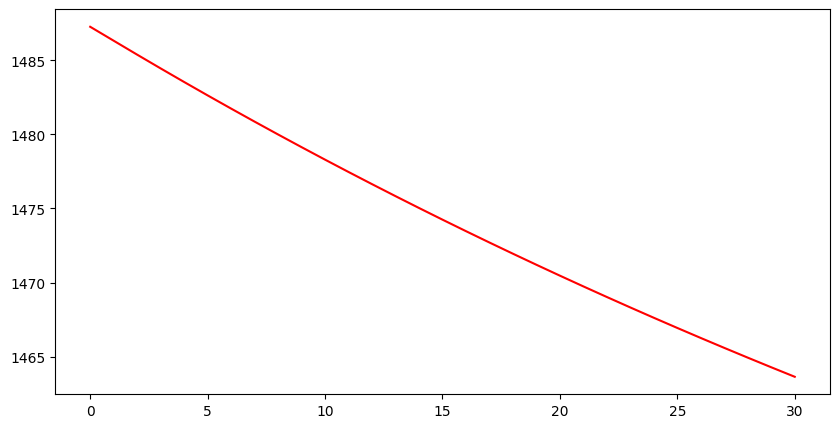

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[200:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")